Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

Loading Train Set

In [61]:
df_train = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\SVM\datasets\train data.csv')
df_train.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
0,0.033303,-0.521107,-0.583143,1.688380,-1.009029,-0.562170,1.639851,-0.624170,0.238208,0.025481,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
1,1.423013,-0.686677,-0.583143,1.118432,-1.655453,-0.932862,-0.111558,0.946827,-1.466883,-0.010096,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
2,-0.547849,-0.521107,-0.583143,-0.655970,-0.511780,-1.268436,-0.461840,0.226294,1.478274,0.986060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
3,0.791327,-0.686677,-0.583143,-0.178246,0.333544,0.167508,1.039368,0.102268,-1.105197,0.452405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
4,-0.143569,-0.686677,-0.583143,1.079698,-1.754903,-0.265617,-0.111558,-0.214687,0.754902,0.559136,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [62]:
x = df_train.drop('remainder__Churn', axis=1)
y = df_train['remainder__Churn']

In [63]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
rf_pipe = Pipeline([
    ('svm', SVC())
])

In [65]:
rf_pipe.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('svm', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False


In [66]:
y_val_pred = rf_pipe.predict(x_validate) 

In [67]:
val_ac_validate = accuracy_score(y_validate, y_val_pred)
print("Accuracy Score:", val_ac_validate)

Accuracy Score: 0.8899297423887588


In [68]:
cv = cross_validate(rf_pipe, x_train, y_train, cv=4)
cv

{'fit_time': array([0.0264039 , 0.02578855, 0.02449656, 0.02385044]),
 'score_time': array([0.01736236, 0.01656651, 0.01591921, 0.01528311]),
 'test_score': array([0.90163934, 0.90375587, 0.91079812, 0.90140845])}

In [69]:
CM_val = confusion_matrix(y_validate, y_val_pred)
CM_val = pd.DataFrame(CM_val)
CM_val

,0,1
0,359,6
1,41,21


In [70]:
CR_val = classification_report(y_validate, y_val_pred, output_dict=True)
CR_val = pd.DataFrame(CR_val)
CR_val

,False,True,accuracy,macro avg,weighted avg
precision,0.897500,0.777778,0.88993,0.837639,0.880116
recall,0.983562,0.338710,0.88993,0.661136,0.889930
f1-score,0.938562,0.471910,0.88993,0.705236,0.870805
support,365.000000,62.000000,0.88993,427.000000,427.000000


Loading Test Set

In [71]:
df_test = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\SVM\datasets\test data.csv')
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,HI,146,510,No,No,0,189.3,77,155.9,128,186.0,83,7.4,3,0,False
1,CO,71,415,No,No,0,277.5,104,131.8,121,126.9,101,8.2,2,1,False
2,VA,99,510,No,No,0,128.3,78,215.3,120,143.7,140,14.3,9,2,False
3,TN,68,415,No,No,0,222.8,99,175.8,85,202.0,111,11.0,3,3,False
4,SD,168,415,No,Yes,22,175.9,70,211.7,105,174.5,81,7.3,5,2,False


In [72]:
preprocessor = joblib.load(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\SVM\datasets\preprocessor.pkl')

In [73]:
test_clean = preprocessor.transform(df_test)

In [74]:
test_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
0,1.145071,1.725917,-0.583143,0.179585,-1.158204,-0.876283,1.389650,-0.293434,-0.898519,-1.006251,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
1,-0.749988,-0.521107,-0.583143,1.806428,0.184369,-1.346476,1.039368,-1.456916,0.031530,-0.721635,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
2,-0.042500,1.725917,-0.583143,-0.945555,-1.108479,0.282617,0.989328,-1.126180,2.046637,1.448560,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
3,-0.825791,-0.521107,-0.583143,0.797490,-0.064255,-0.488032,-0.762081,0.021553,0.548224,0.274520,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
4,1.700955,-0.521107,1.049991,-0.067577,-1.506278,0.212381,0.238724,-0.519831,-1.001858,-1.041828,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False


Test Set Feature Selection

In [75]:
x_test = test_clean.drop('remainder__Churn', axis=1)
y_test = test_clean['remainder__Churn']

In [76]:
y_svm_test = rf_pipe.predict(x_test) 

In [77]:
svm_ac_test = accuracy_score(y_test, y_svm_test)
print("Accuracy Score:", svm_ac_test)

Accuracy Score: 0.8895131086142322


In [78]:
for k in ['linear', 'rbf']:
    model = SVC(kernel=k).fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    print(f"Kernel: {k}, Accuracy: {acc:.2f}")

Kernel: linear, Accuracy: 0.84
Kernel: rbf, Accuracy: 0.89


In [79]:
CM_test = confusion_matrix(y_test, y_svm_test)
CM_test = pd.DataFrame(CM_test)
CM_test

,0,1
0,447,9
1,50,28


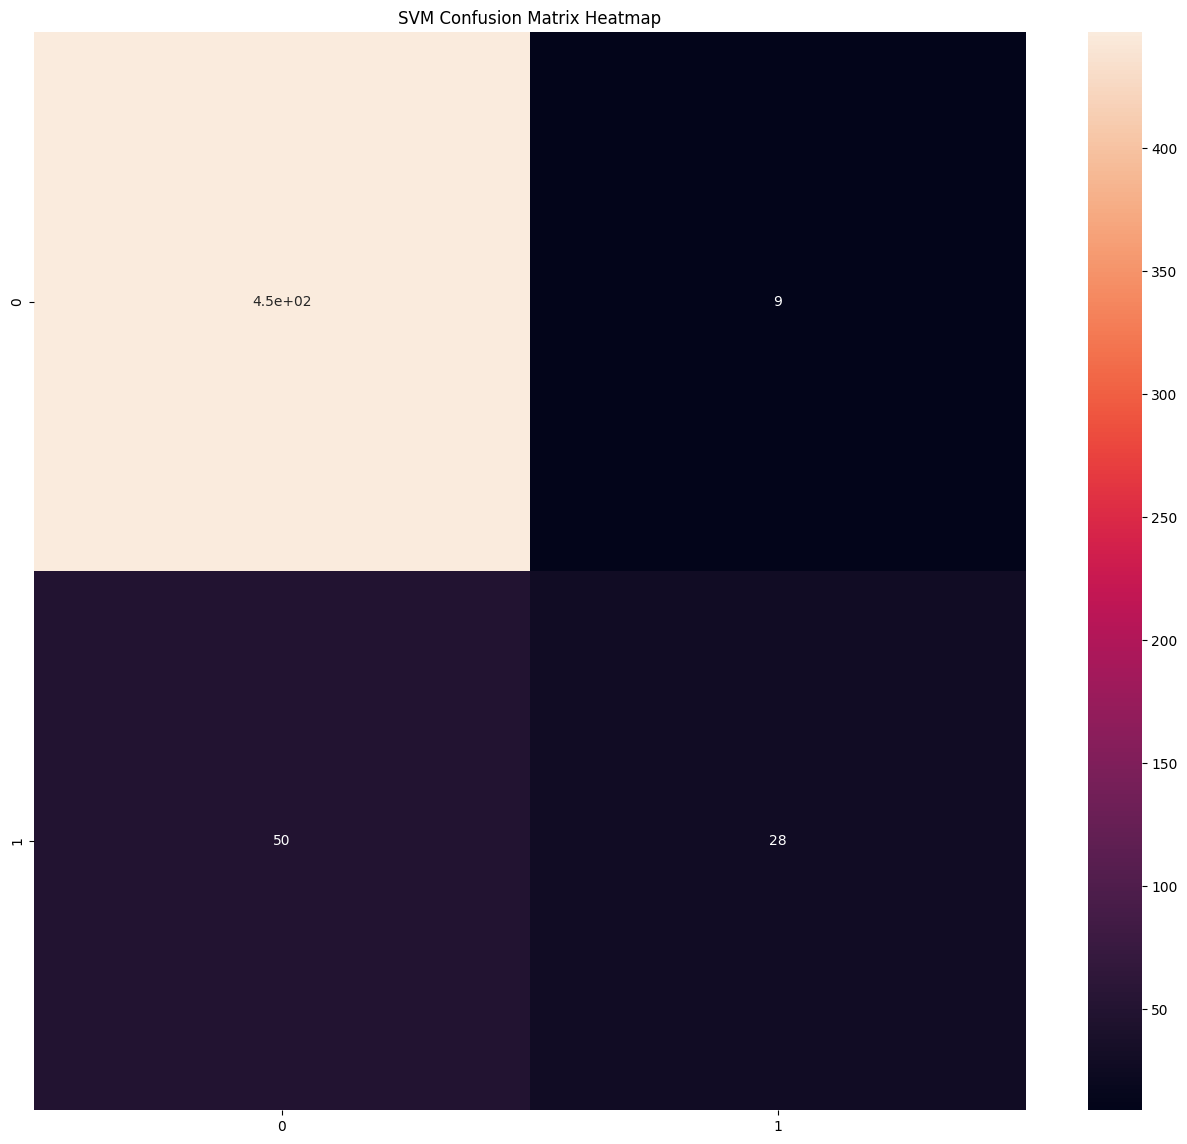

In [80]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_test, annot=True)
plt.title('SVM Confusion Matrix Heatmap')
plt.show()

In [81]:
CR_test = classification_report(y_test, y_svm_test, output_dict=True)
CR_test = pd.DataFrame(CR_test)
CR_test

,False,True,accuracy,macro avg,weighted avg
precision,0.899396,0.756757,0.889513,0.828077,0.878561
recall,0.980263,0.358974,0.889513,0.669619,0.889513
f1-score,0.938090,0.486957,0.889513,0.712523,0.872194
support,456.000000,78.000000,0.889513,534.000000,534.000000


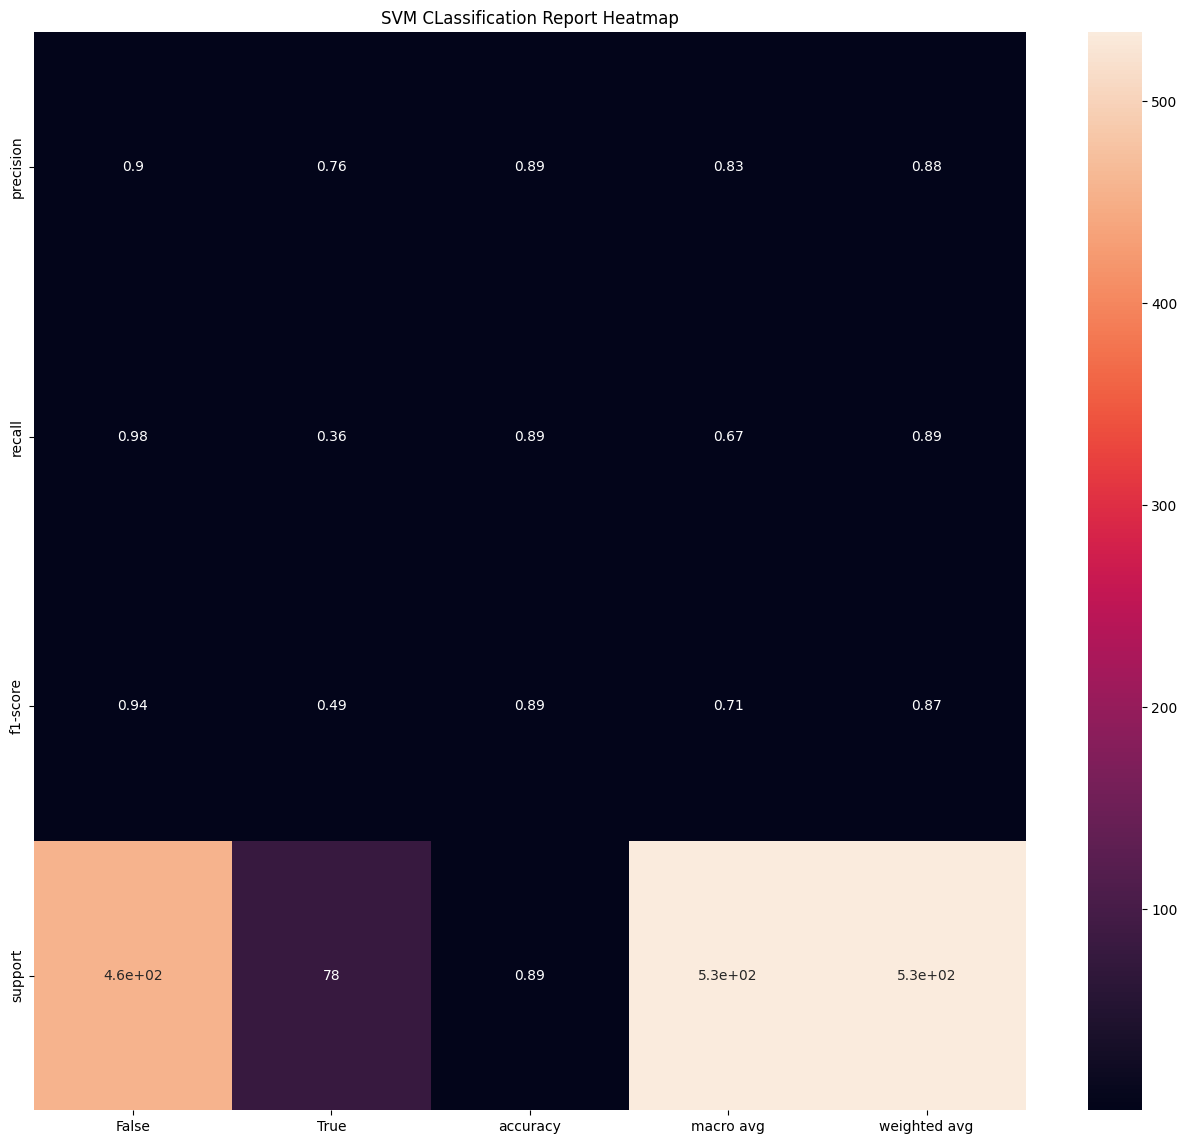

In [82]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_rf_test, annot=True)
plt.title('SVM CLassification Report Heatmap')
plt.show()

In [83]:
joblib.dump(rf_pipe, 'model.pkl')

['model.pkl']